In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter


In [4]:

# Load the Excel file
def load_data(file_path):
    return pd.read_excel(file_path, sheet_name='Sheet1')

# Display Basic Information
def display_basic_info(data):
    print(data.head())
    data.info()
    print(data.describe())
    print(data.isnull().sum())

# Plot Missing Values Heatmap
def plot_missing_values(data):
    plt.figure(figsize=(8, 5))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.show()

# Plot Distribution of Likes
def plot_likes_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Likes'], bins=30, kde=True)
    plt.xlabel('Number of Likes')
    plt.ylabel('Frequency')
    plt.title('Distribution of Likes on Comments')
    plt.show()

# Plot Top Authors by Number of Comments
def plot_top_authors(data):
    top_authors = data['Author'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_authors.values, y=top_authors.index, palette='Blues_d')
    plt.xlabel('Number of Comments')
    plt.ylabel('Author')
    plt.title('Top 10 Authors by Number of Comments')
    plt.show()

# Generate Word Cloud
def generate_word_cloud(data):
    comments_text = ' '.join(comment for comment in data['Comment'] if pd.notnull(comment))
    if comments_text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(comments_text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud for Comments')
        plt.show()
    else:
        print("No valid comments to generate word cloud.")

# Plot Pairplot for Numerical Features
def plot_pairplot(data):
    plt.figure(figsize=(12, 8))
    sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
    plt.suptitle('Pairplot for Numerical Features', y=1.02)
    plt.show()

# Plot Comment Length Distribution
def plot_comment_length_distribution(data):
    data['Comment_Length'] = data['Comment'].apply(lambda x: len(x) if pd.notnull(x) else 0)
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Comment_Length'], bins=30, kde=True)
    plt.xlabel('Comment Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Comment Lengths')
    plt.show()

# Plot Likes Across Different Timestamps
def plot_likes_across_timestamps(data):
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
    data.dropna(subset=['Timestamp'], inplace=True)
    data['Date'] = data['Timestamp'].dt.date
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Date', y='Likes', data=data)
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Number of Likes')
    plt.title('Comparison of Likes Across Different Timestamps')
    plt.show()

# Plot Comments by Likes Category
def plot_comments_by_likes_category(data):
    # Set the bins, ensuring the maximum value is a bit higher to maintain monotonicity
    max_likes = data['Likes'].max()
    bins = [0, 10, 50, 100, 500, max_likes + 1]  # Adding 1 ensures bins increase monotonically
    labels = ['0-10', '10-50', '50-100', '100-500', '500+']
    # bins = [0, 10, 50, 100, 500, data['Likes'].max()]
    # labels = ['0-10', '10-50', '50-100', '100-500', '500+']
    # Apply categorization with pd.cut
    data['Likes_Category'] = pd.cut(data['Likes'], bins=bins, labels=labels, include_lowest=True)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Likes_Category', data=data, palette='viridis')
    plt.title('Comments by Likes Category')
    plt.xlabel('Likes Category')
    plt.ylabel('Number of Comments')
    plt.show()

# Plot Average Comment Length by Likes Category
def plot_avg_comment_length(data):
    avg_comment_length = data.groupby('Likes_Category')['Comment_Length'].mean()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_comment_length.index, y=avg_comment_length.values, palette='magma')
    plt.xlabel('Likes Category')
    plt.ylabel('Average Comment Length')
    plt.title('Average Comment Length by Likes Category')
    plt.show()

# Plot Relationship Between Comment Length and Likes
def plot_comment_length_vs_likes(data):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Comment_Length', y='Likes', data=data, alpha=0.6)
    plt.xlabel('Comment Length')
    plt.ylabel('Number of Likes')
    plt.title('Relationship Between Comment Length and Likes')
    plt.show()

# Plot Daily Comment Trends
def plot_daily_comment_trends(data):
    daily_comments = data['Date'].value_counts().sort_index()
    plt.figure(figsize=(14, 8))
    plt.plot(daily_comments.index, daily_comments.values, marker='o')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Number of Comments')
    plt.title('Daily Comment Trends')
    plt.grid(True)
    plt.show()

# Analyze Top Words in Comments
def analyze_top_words(data):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    processed_comments = [re.sub(r'[^a-zA-Z ]', '', comment.lower()) for comment in data['Comment'] if pd.notnull(comment)]
    filtered_words = [word for comment in processed_comments for word in comment.split() if word not in stop_words]
    if filtered_words:
        top_words = Counter(filtered_words).most_common(20)
        words, counts = zip(*top_words)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(counts), y=list(words), palette='viridis')
        plt.xlabel('Count')
        plt.ylabel('Words')
        plt.title('Top 20 Words in Comments (Excluding Stopwords)')
        plt.show()
    else:
        print("No valid words available for analysis.")

# Plot Correlation Heatmap
def plot_correlation_heatmap(data):
    plt.figure(figsize=(10, 6))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap Between Numerical Features')
    plt.show()

# Perform Unsupervised Spam Detection using TF-IDF and KMeans
def spam_detection_kmeans(data):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    cleaned_comments = [re.sub(r'[^a-zA-Z ]', '', comment.lower()) for comment in data['Comment'] if pd.notnull(comment)]
    filtered_comments = [' '.join(word for word in comment.split() if word not in stop_words) for comment in cleaned_comments]
    
    # Vectorizing the comments using TF-IDF
    vectorizer = TfidfVectorizer(max_features=500)
    X = vectorizer.fit_transform(filtered_comments)
    
    # Applying KMeans clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(X)
    data['Spam_Label'] = labels
    
    # Visualizing the clusters with PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X.toarray())
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('KMeans Clustering of Comments for Spam Detection')
    plt.show()

    # Visualizing the distribution of Spam vs Not Spam comments
    data['Spam_Label'] = data['Spam_Label'].apply(lambda x: 'Spam' if x == labels[np.argmax(np.bincount(labels))] else 'Not Spam')
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Spam_Label', data=data, palette='Set1')
    plt.xlabel('Label (Spam vs Not Spam)')
    plt.ylabel('Number of Comments')
    plt.title('Distribution of Spam vs Not Spam Comments')
    plt.show()


                 Author   Timestamp  Likes  \
0   @holdtightadele8017  2 days ago  132.0   
1   @archanakhakase6357  2 days ago   76.0   
2        @kabiruddin434  2 days ago  948.0   
3  @everythingarsenaltv  2 days ago  591.0   
4         @tggazard9840  2 days ago   54.0   

                                             Comment  
0    Thomas Partey… man has been bringing it lately.  
1  Saka is the best he prove this  everytime by d...  
2     That pass from Ben White to Saka was amazing.   
3               Saka and Partey were so so good man   
4  " Keep Saka's name out your mouth,  dude is wo...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Author     653 non-null    object 
 1   Timestamp  653 non-null    object 
 2   Likes      208 non-null    float64
 3   Comment    653 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.5+

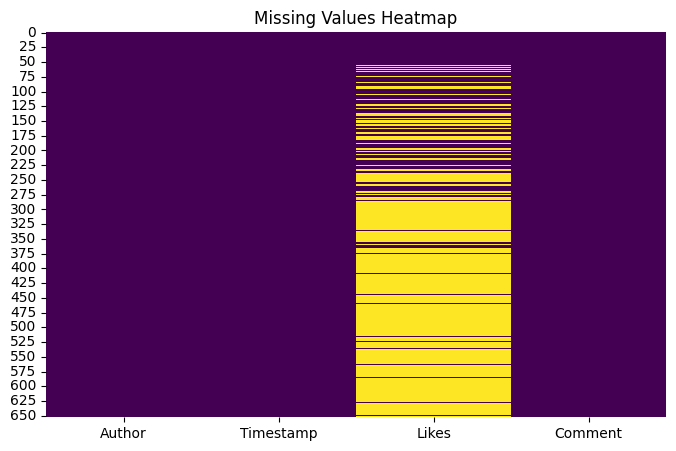

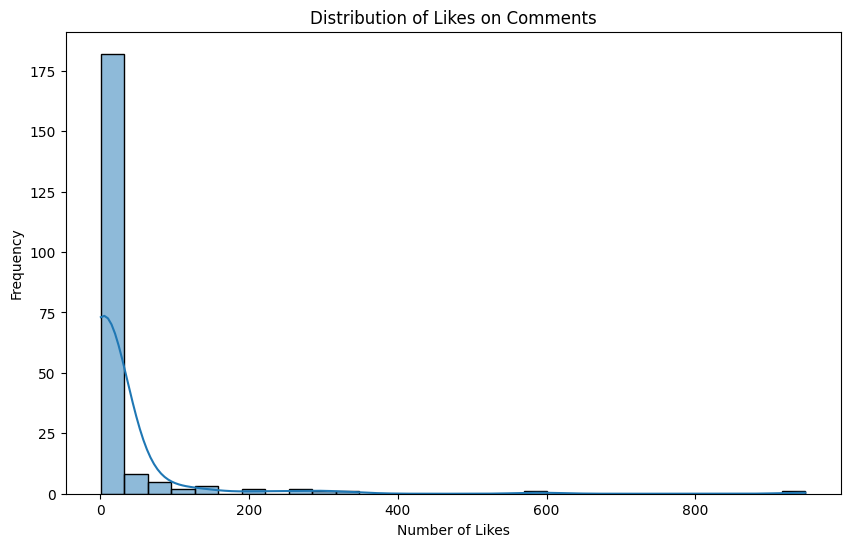

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14332\3942398836.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='Blues_d')


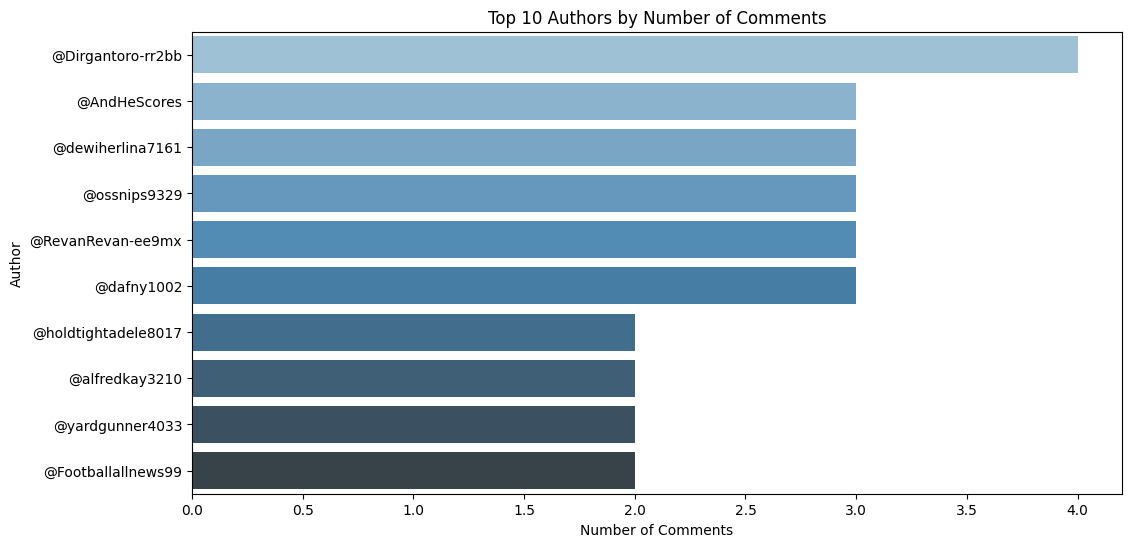

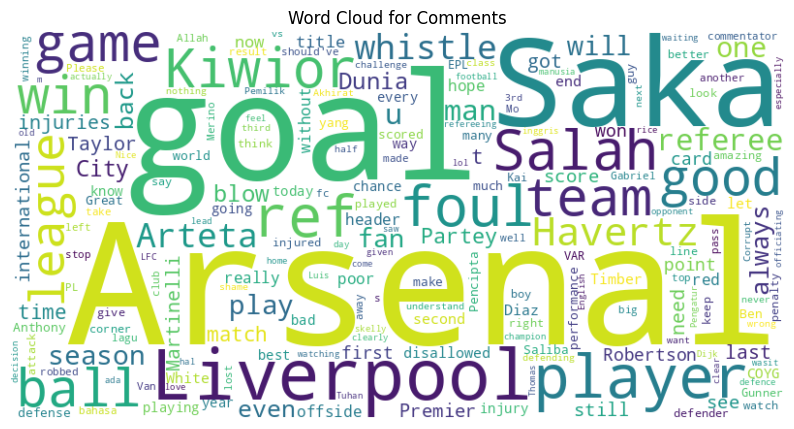

<Figure size 1200x800 with 0 Axes>

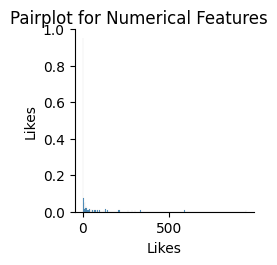

In [6]:

# Main execution
# def main():
data = load_data('youtube_comments_i6IOiUi6IYY.xlsx')
display_basic_info(data)
plot_missing_values(data)
plot_likes_distribution(data)
plot_top_authors(data)
generate_word_cloud(data)
plot_pairplot(data)


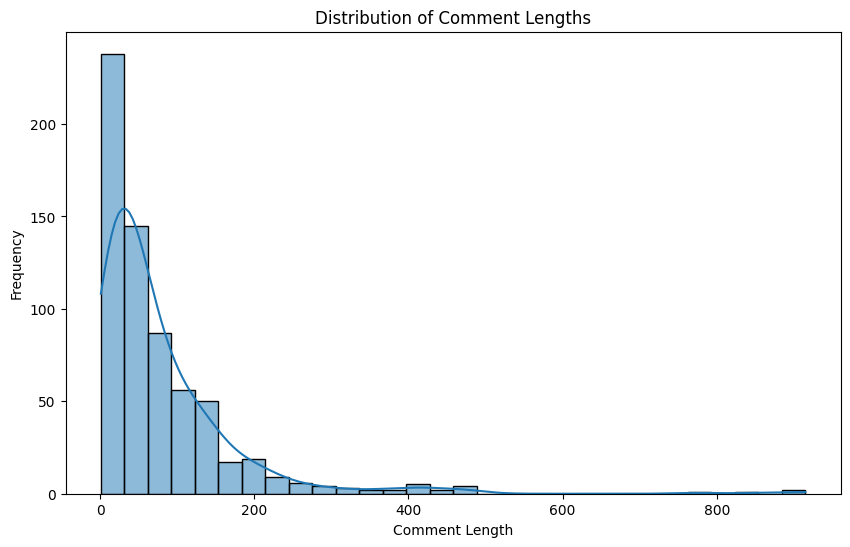

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14332\3942398836.py:70: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')


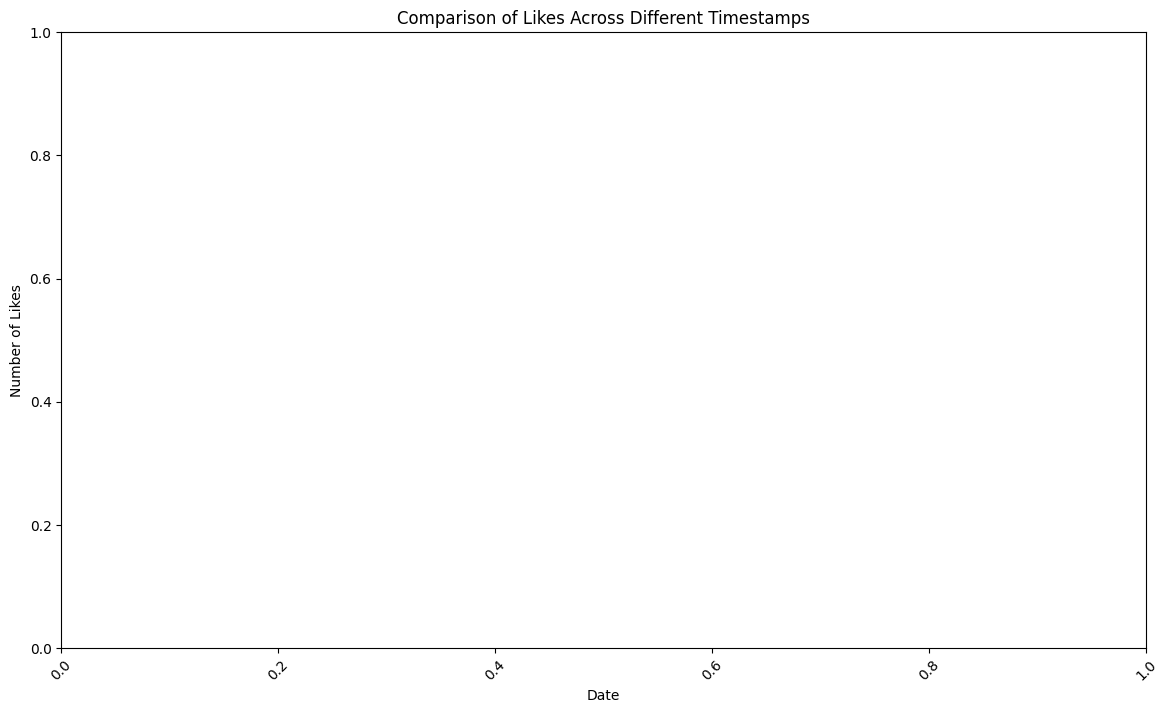

ValueError: bins must increase monotonically.

In [7]:

plot_comment_length_distribution(data)
plot_likes_across_timestamps(data)
plot_comments_by_likes_category(data)
plot_avg_comment_length(data)


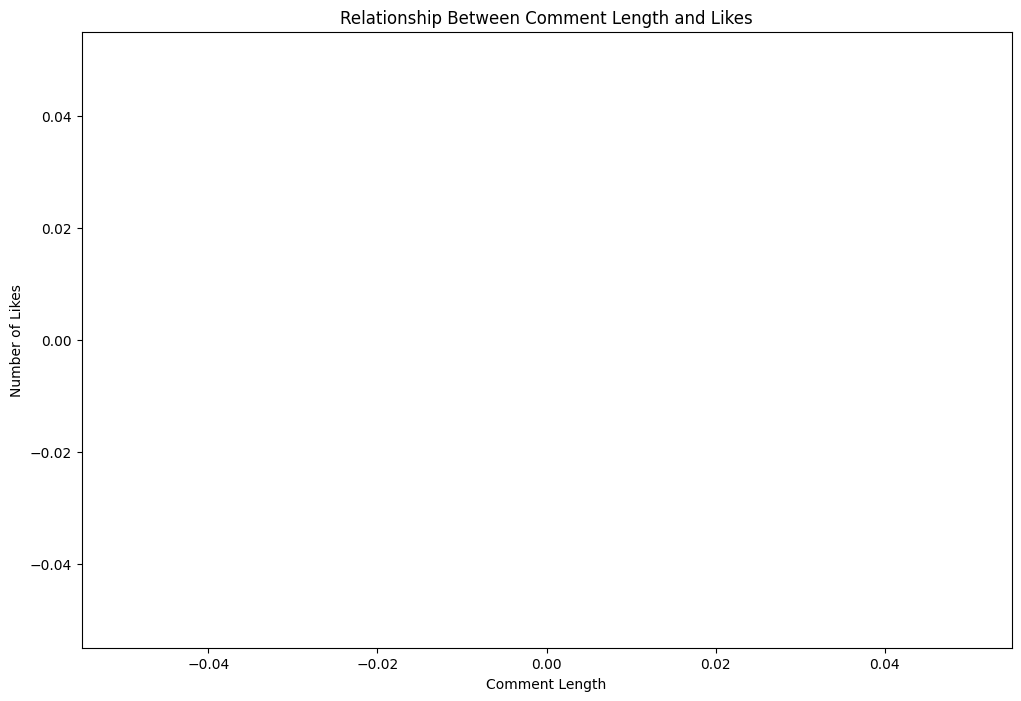

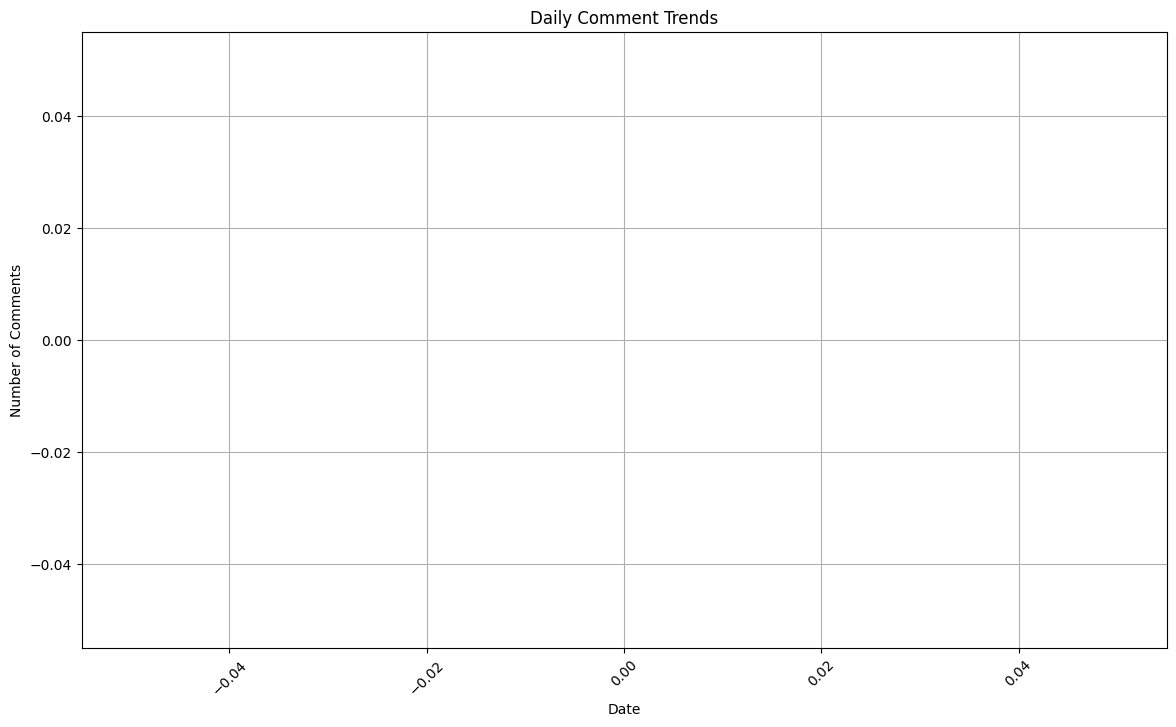

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


No valid words available for analysis.


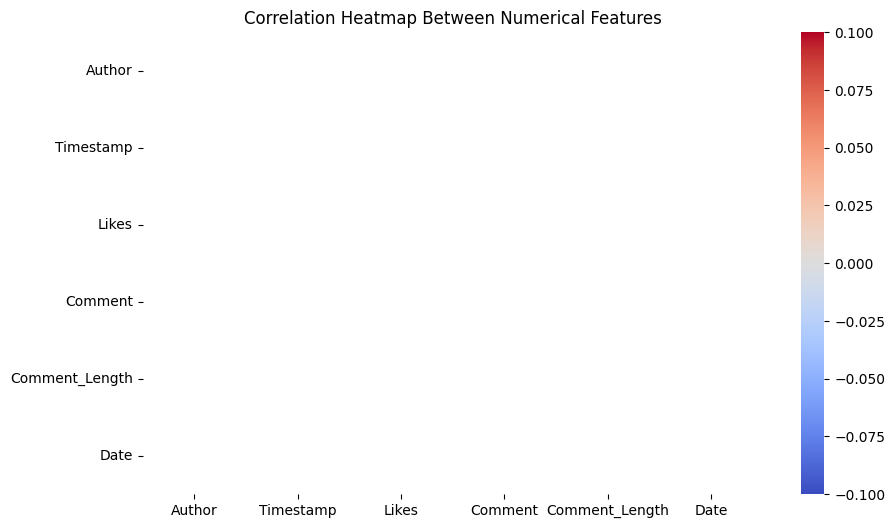

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [8]:
plot_comment_length_vs_likes(data)
plot_daily_comment_trends(data)
analyze_top_words(data)
plot_correlation_heatmap(data)
spam_detection_kmeans(data)

# if __name__ == "__main__":
#     main()
